In [76]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

In [77]:

states = np.array([0,1])
actions = np.array([0,1]) #0 = stay , #1 = move
N = 200000 #number of steps
phi = 500 #soft-min parameter
p = 0.01
c = 5
gamma = 0.5
tol_q = 0.1
tol_mu = 0.01
om_q = 0.85
om_mu = 0.55

Q = np.zeros((N+1, 2, 2))
Q[0,:,:] = [[10,10],[10,10]]

mu = np.zeros((N+1, 2, 2, 2))
for x in range(2):
    for a in range(2):
        mu[0, x, a] = [0.5, 0.5]


def rhosCalc (count_xa, n):
    rhoQ = 1 / np.pow(1 + count_xa, om_q)
    rhoMu = 1 / np.pow(2 + n, om_mu)
    return { 'q': rhoQ, 'mu': rhoMu }

def env(state, action, mu):
    newS = state
    if random.random() > p:
        newS = (state + action) % 2
    else: 
        newS = (state + (1-action)) % 2

    return { "newState": newS,  "cost": newS + (c * mu[0])}

def stable_softmin_action(q_values, actions, phi=phi):

    z = -phi * np.array(q_values)
    z -= np.max(z)
    w = np.exp(z)
    probs = w / np.sum(w)

    if not np.all(np.isfinite(probs)):
        probs = np.ones(len(actions)) / len(actions)

    action = np.random.choice(actions, p=probs)

    return action, probs



In [88]:

# initialize count for finding rho_Q (learning rate)
count = [[0, 0],[0,0]]

x = np.random.choice(states)
mu[0] = [1,0] if x == 0 else [0,1]

# iterate N times
for n in range(N):

    # copy new Q matrix, mu distribution
    Q[n + 1] = Q[n].copy()
    mu[n + 1] = mu[n].copy()
    # use softmin to choose next action
    a, probs = stable_softmin_action(Q[n][x], actions)
    # update counter for rho calculation
    
    count[x][a] += 1
    rhos = rhosCalc(count[x][a], n)

    # input state, action, mu into environment
    # and receive new state and cost
    envir = env(x, a, mu[n][x][a])

    New_x = envir["newState"]
    delta_X_n = np.zeros(len(states))
    delta_X_n[New_x] = 1
    mu[n + 1][x][a] = mu[n][x][a] + rhos['mu'] * (delta_X_n - mu[n][x][a])

    # update Q matrix, current state, mu distribution
    Q[n+1][x][a] = Q[n][x][a] + rhos['q'] * (envir["cost"] + gamma * (np.min(Q[n][New_x])) - Q[n][x][a])

    x = New_x
    


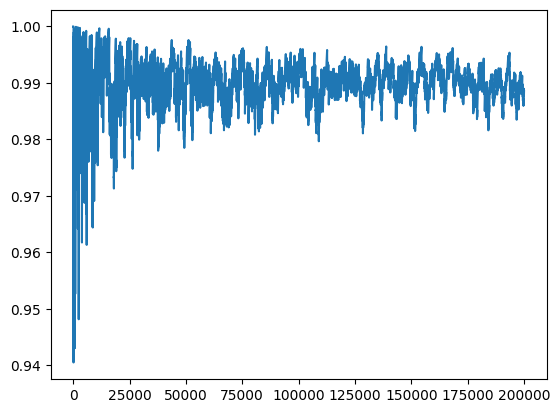

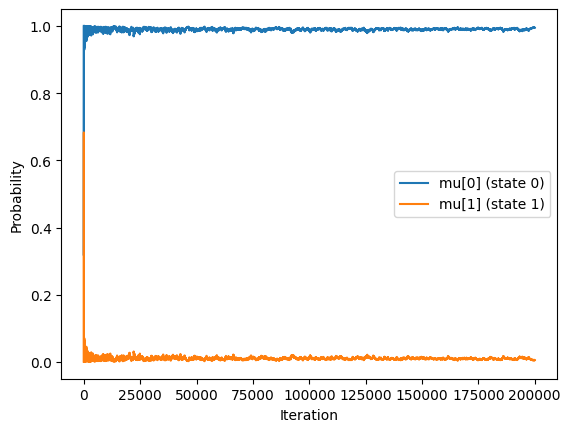

Final mu: [0.99413839 0.00586161]


In [75]:
import matplotlib.pyplot as plt

# After your loop
plt.plot(mu[:, 0], label='mu[0] (state 0)')
plt.plot(mu[:, 1], label='mu[1] (state 1)')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend()
plt.show()

print(f"Final mu: {mu[-1]}")